# Should I go to CU Boulder or CSU Fort Collins to have the highest expected starting salary in a career in data science?
# The random variable I am studying is the starting salary in a career in data science.
# One trial of the simulation would look like comparing the average starting salary in a career in data science at both colleges.
# I would be measuring the outcome where a starting salary in data science after going to CU Boulder is higher than that of CSU Fort Collins.
# Unfortunately, I was not able to able to find detailed data broken down by both university and job.
# Therefore, I will be using the median entry-level earnings from the DOE's College Scorecard.

CU Boulder Expected Average Salary: 70403.3165037958
CSU Fort Collins Expected Average Salary: 61317.681133283026


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


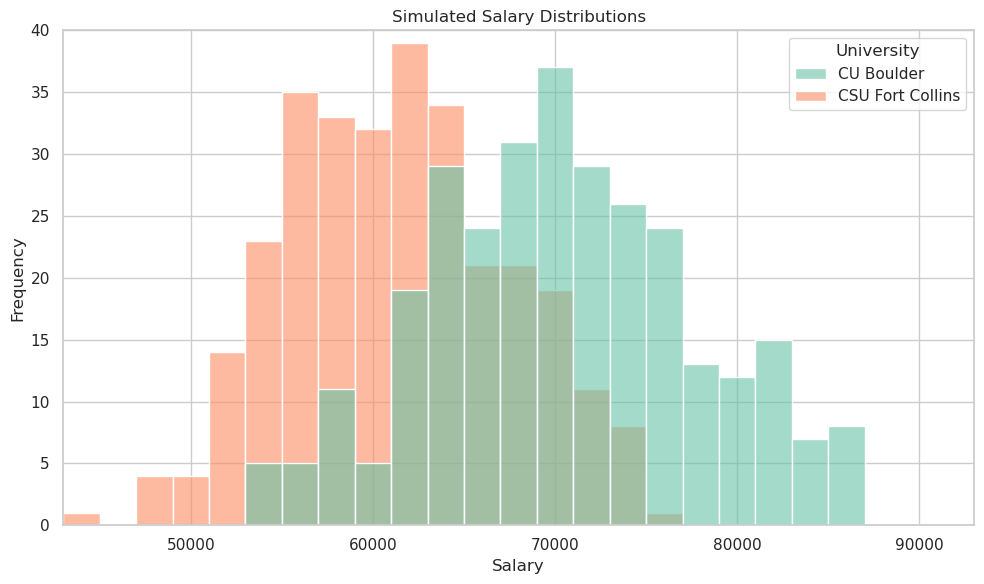

In [28]:
import random as rand
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cu_boulder_median = 69738
csu_fort_collins_median = 60543

cu_boulder_data = []
csu_fort_collins_data = []

noise = 0.1
trials = 300
for _ in range(trials):
    # Add random variation to simulate noise
    die_1 = rand.uniform(1 - noise, 1 + noise)
    die_2 = rand.uniform(1 - noise, 1 + noise)
    die_3 = rand.uniform(1 - noise, 1 + noise)
    die_4 = rand.uniform(1 - noise, 1 + noise)
    die_5 = rand.uniform(1 - noise, 1 + noise)
    die_6 = rand.uniform(1 - noise, 1 + noise)
    cu_boulder_data.append(cu_boulder_median * die_1 * die_2 * die_3)
    csu_fort_collins_data.append(csu_fort_collins_median * die_4 * die_5 * die_6)

print("CU Boulder Expected Average Salary:", pd.Series(cu_boulder_data).mean())
print("CSU Fort Collins Expected Average Salary:", pd.Series(csu_fort_collins_data).mean())

data = pd.DataFrame({
    "Salary": cu_boulder_data + csu_fort_collins_data,
    "University": ["CU Boulder"] * len(cu_boulder_data) + ["CSU Fort Collins"] * len(csu_fort_collins_data)
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Salary", hue="University", binwidth=2000, binrange=(43000, 93000), palette="Set2", alpha=0.6)

plt.title("Simulated Salary Distributions")
plt.xlabel("Salary")
plt.ylabel("Frequency")

# Minimum possible is all die rolling 0.9 for CSU Fort Collins ($44,136)
# Maximum possible is all die rolling 1.1 for CU Boulder ($92,821)
plt.xlim(43000, 93000)

plt.ylim(0, 40)
plt.tight_layout()
plt.show()

# The average expected salary straight out of CU Boulder is higher than straight out of CSU Fort Collins by about 9,000 dollars.
# Specifically, it is about 70,403 dollars for CU Boulder and about 61,318 dollars for CSU Fort Collins.
# Looking at the histogram, it appears a majority of the data for CU Boulder lies higher than a majority of the data for CSU Fort Collins.
# (The dollar symbol breaks the formatting.)